## loading package

In [4]:
# !pip install pandas geopandas shapely

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

## loading data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('/Users/John/Desktop/DS340W/data/NYPD_Complaint_Data_Current.csv')

df.head()

/var/folders/r6/qcs_flrd7fj2bg8ml8rp61lc0000gn/T/ipykernel_6543/106542698.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/John/Desktop/DS340W/data/NYPD_Complaint_Data_Current.csv')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,(null),NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


## summarize data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282069 entries, 0 to 282068
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                282069 non-null  object 
 1   ADDR_PCT_CD               282069 non-null  int64  
 2   BORO_NM                   282069 non-null  object 
 3   CMPLNT_FR_DT              282069 non-null  object 
 4   CMPLNT_FR_TM              282069 non-null  object 
 5   CMPLNT_TO_DT              267186 non-null  object 
 6   CMPLNT_TO_TM              282069 non-null  object 
 7   CRM_ATPT_CPTD_CD          282069 non-null  object 
 8   HADEVELOPT                282069 non-null  object 
 9   HOUSING_PSA               17650 non-null   float64
 10  JURISDICTION_CODE         282069 non-null  int64  
 11  JURIS_DESC                282069 non-null  object 
 12  KY_CD                     282069 non-null  int64  
 13  LAW_CAT_CD                282069 non-null  o

### data dictionary

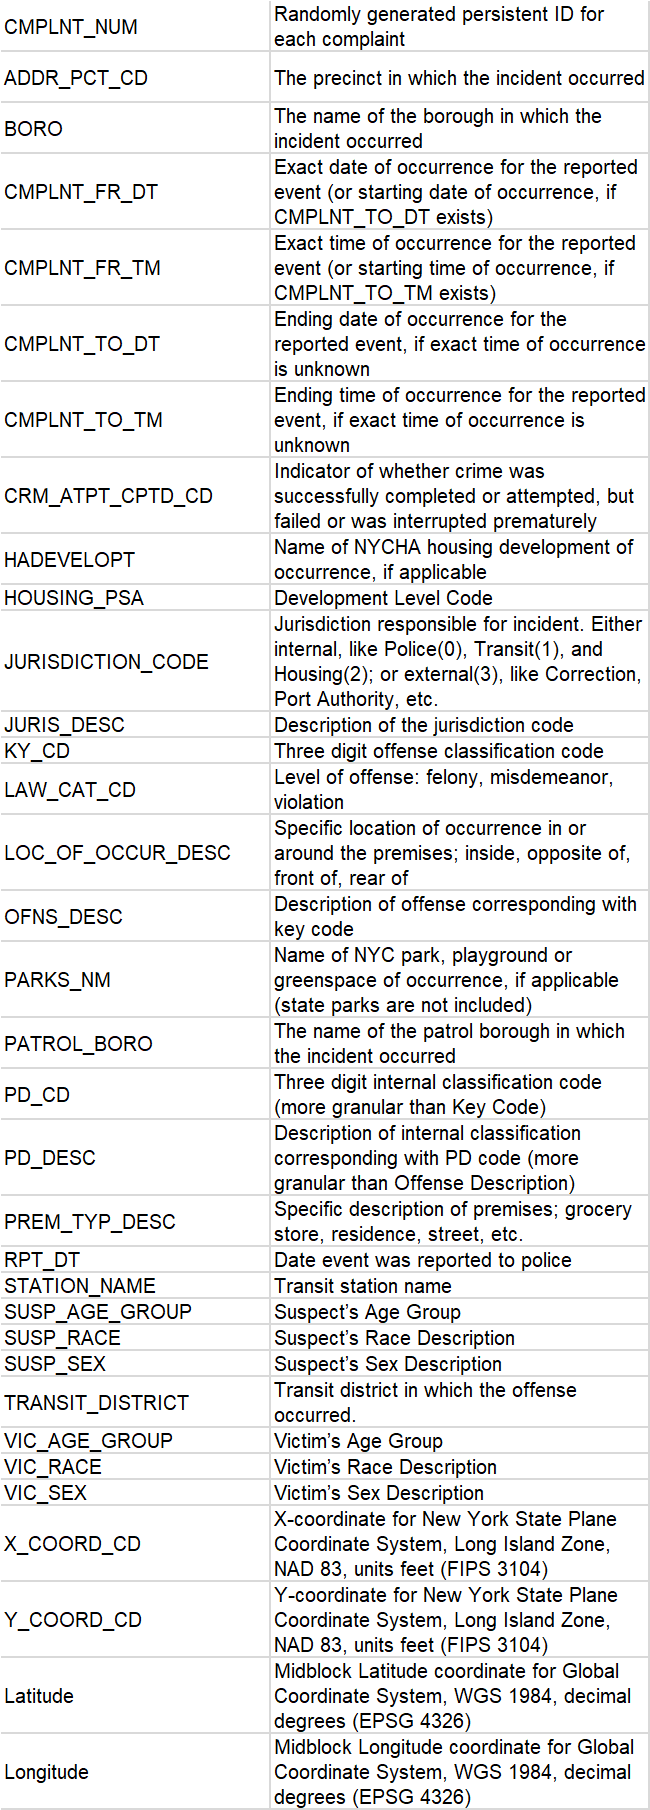

## missingness




### replacing (null) to actual NULL value

In [5]:
df = df.replace('(null)', np.nan)
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632)
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925)
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,NaN,NaN,...,2.0,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041)
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542)
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,NaN,NaN,...,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874)


### check missingness in each col

In [6]:
n = df.isnull().mean()
n.sort_values(ascending=False)

HADEVELOPT                  0.996987
PARKS_NM                    0.994618
TRANSIT_DISTRICT            0.955869
STATION_NAME                0.955869
HOUSING_PSA                 0.937427
LOC_OF_OCCUR_DESC           0.215791
SUSP_AGE_GROUP              0.112767
SUSP_RACE                   0.112767
SUSP_SEX                    0.112767
CMPLNT_TO_DT                0.052764
CMPLNT_TO_TM                0.052012
PREM_TYP_DESC               0.044574
PD_DESC                     0.000610
PD_CD                       0.000610
BORO_NM                     0.000532
VIC_RACE                    0.000050
OFNS_DESC                   0.000018
Y_COORD_CD                  0.000014
Latitude                    0.000014
Longitude                   0.000014
Lat_Lon                     0.000014
X_COORD_CD                  0.000014
New Georeferenced Column    0.000014
RPT_DT                      0.000000
ADDR_PCT_CD                 0.000000
PATROL_BORO                 0.000000
LAW_CAT_CD                  0.000000
V

<Axes: >

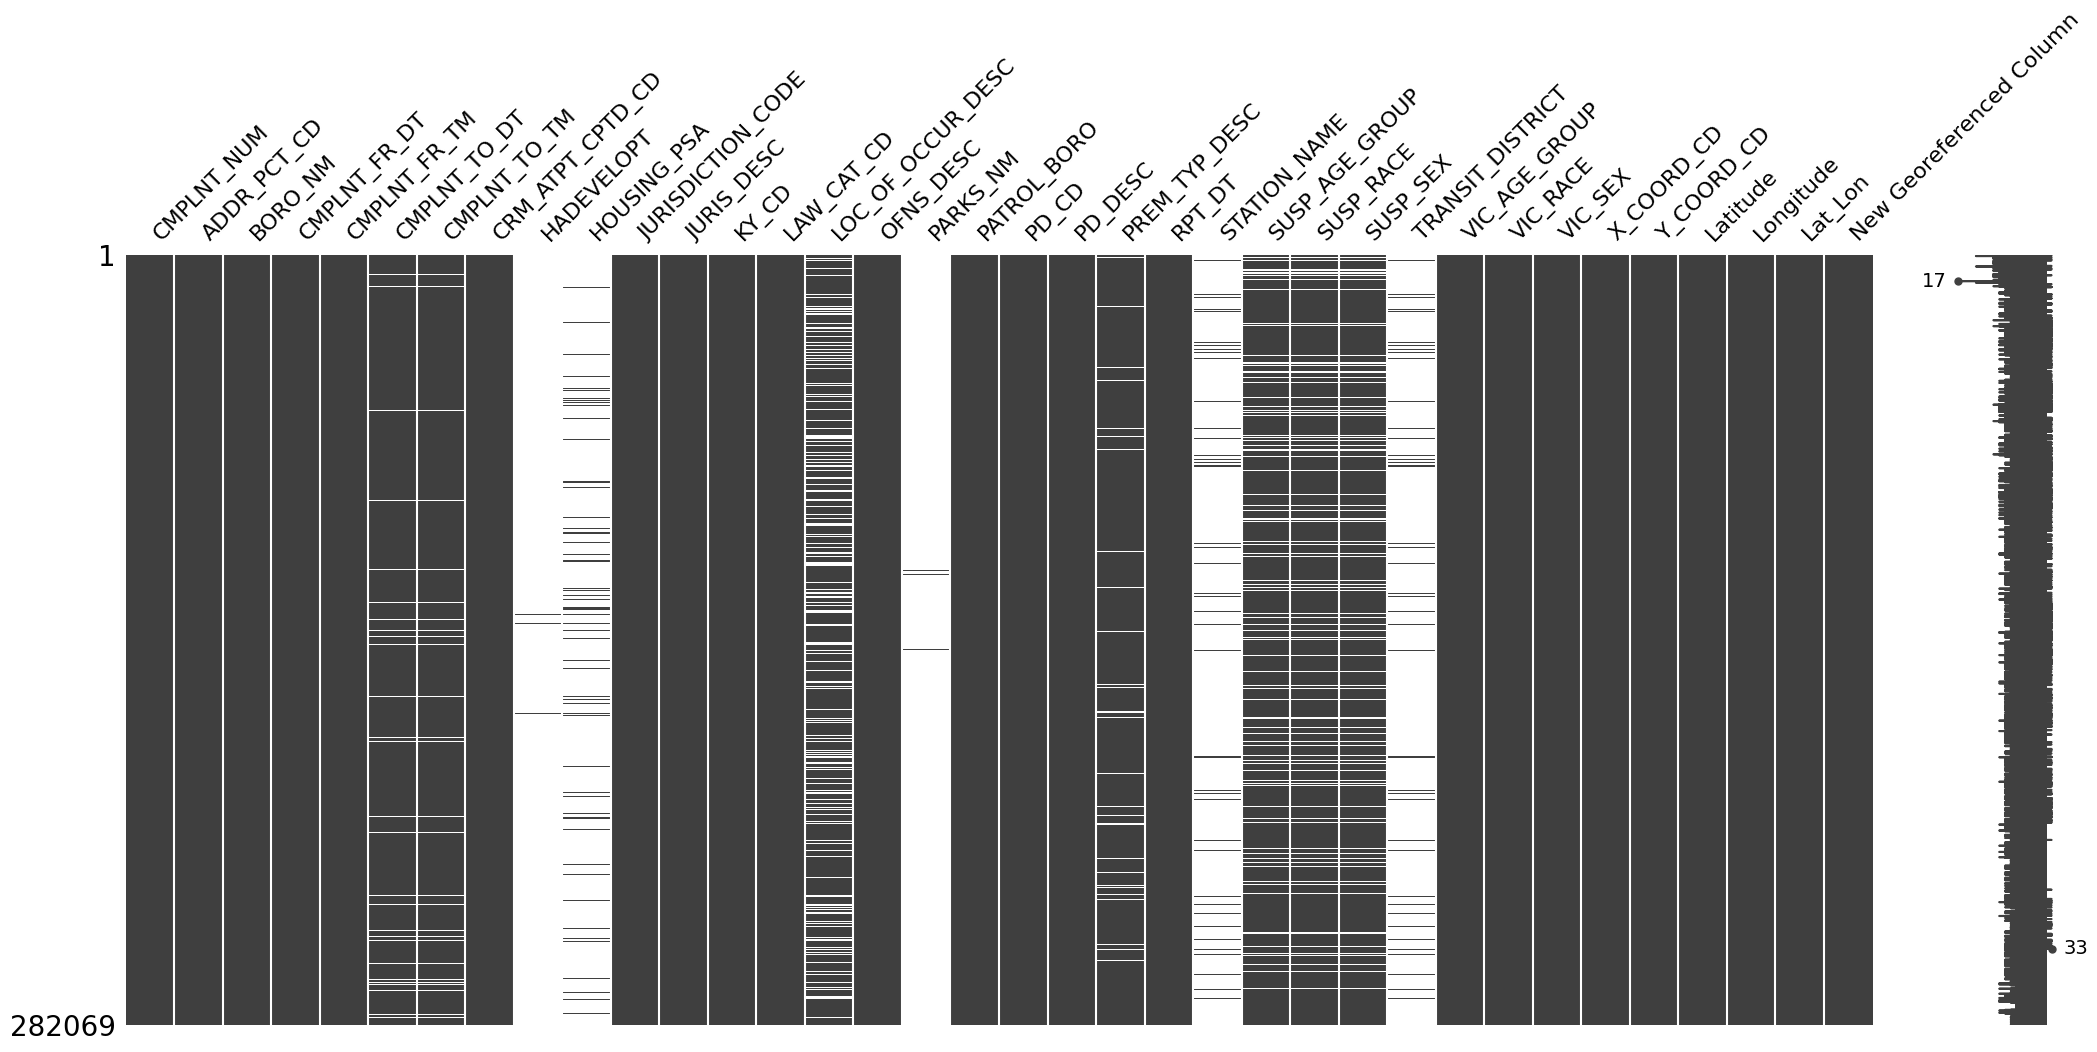

In [7]:
import missingno as msno
msno.matrix(df)

### remove columns with high missingness

having over 30% of missing value is concerning. since 'HADEVELOPT', 'PARKS_NM', 'STATION_NAME', 'HOUSING_PSA' and 'TRANSIT_DISTRICT' over 90% of missingness, we will remove the variables,

In [8]:
print(df.shape)

df = df.drop(['HADEVELOPT', 'PARKS_NM', 'STATION_NAME', 'HOUSING_PSA', 'TRANSIT_DISTRICT'], axis=1)

print(df.shape)

(282069, 36)
(282069, 31)


## feature engineering

### split CMPLNT_FR_DT to MONTH, YEAR and DATE.

We are going to use CMPLNT_FR_DT since we are interested in closest time to actual occurence time of crime.

In [9]:
def parse_year(date):
    return int(date.split('/')[2])

def parse_month(date):
    return int(date.split('/')[0])

def parse_day(date):
    return int(date.split('/')[1])

In [10]:
df['CMPLNT_FR_YEAR'] = df['CMPLNT_FR_DT'].apply(parse_year)
df['CMPLNT_FR_MONTH'] = df['CMPLNT_FR_DT'].apply(parse_month)
df['CMPLNT_FR_DAY'] = df['CMPLNT_FR_DT'].apply(parse_day)
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,NaN,COMPLETED,0,N.Y. POLICE DEPT,...,F,985764.0,213806.0,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632),2024,1,11
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,F,954827.0,148519.0,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925),2015,1,1
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,1,N.Y. TRANSIT POLICE,...,F,982466.0,197787.0,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041),2024,6,20
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,0,N.Y. POLICE DEPT,...,F,938414.0,170500.0,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542),2024,3,11
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,M,941085.0,135276.0,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874),2023,11,14


### create zipcode variable using longitude and latitude

In [11]:
nyc_zipcode = gpd.read_file('./Modified Zip Code Tabulation Areas (MODZCTA)_20241012.geojson')

df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
df_gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

df_gdf_zip = gpd.sjoin(df_gdf, nyc_zipcode, how='left')

In [14]:
df_gdf_zip['zipcode'] = df_gdf_zip['modzcta']

df_gdf_zip.drop(['label', 'zcta', 'index_right', 'modzcta'], axis = 1)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,Latitude,Longitude,Lat_Lon,New Georeferenced Column,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,geometry,pop_est,zipcode
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,NaN,COMPLETED,0,N.Y. POLICE DEPT,...,40.753533,-73.994537,"(40.7535327012632, -73.9945368920152)",POINT (-73.9945368920152 40.7535327012632),2024,1,11,POINT (-73.99454 40.75353),9687,10018
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.574286,-74.105914,"(40.5742856881925, -74.1059144051212)",POINT (-74.1059144051212 40.5742856881925),2015,1,1,POINT (-74.10591 40.57429),53142,10306
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,1,N.Y. TRANSIT POLICE,...,40.709556,-74.006435,"(40.70955616028041, -74.00643483276845)",POINT (-74.00643483276845 40.70955616028041),2024,6,20,POINT (-74.00643 40.70956),22800,10038
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.634542,-74.165142,"(40.634542, -74.165142)",POINT (-74.165142 40.634542),2024,3,11,POINT (-74.16514 40.63454),25947,10303
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.537874,-74.155293,"(40.537874, -74.155293)",POINT (-74.155293 40.537874),2023,11,14,POINT (-74.15529 40.53787),61741,10312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282064,285642938,105,QUEENS,04/13/2024,14:25:00,04/13/2024,14:40:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.658385,-73.757935,"(40.658385, -73.757935)",POINT (-73.757935 40.658385),2024,4,13,POINT (-73.75794 40.65838),42443,11413
282065,283438384,113,QUEENS,03/08/2024,12:30:00,03/08/2024,12:40:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.679481,-73.753709,"(40.679481, -73.753709)",POINT (-73.753709 40.679481),2024,3,8,POINT (-73.75371 40.67948),42443,11413
282066,283855204,105,QUEENS,03/15/2024,18:00:00,03/16/2024,14:00:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.731658,-73.718494,"(40.731658, -73.718494)",POINT (-73.718494 40.731658),2024,3,15,POINT (-73.71849 40.73166),20801,11426
282067,288669905,111,QUEENS,06/17/2024,23:40:00,06/18/2024,00:15:00,COMPLETED,0,N.Y. POLICE DEPT,...,40.744204,-73.762960,"(40.744204, -73.76296)",POINT (-73.76296 40.744204),2024,6,17,POINT (-73.76296 40.7442),36806,11364


In [21]:
df_gdf_zip.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon', 'New Georeferenced Column', 'CMPLNT_FR_YEAR',
       'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY', 'geometry', 'index_right',
       'modzcta', 'label', 'zcta', 'pop_est', 'zipcode'],
      dtype='object')

## export the final data

In [18]:
df_gdf_zip.to_csv('/Users/John/Desktop/DS340W/data/NYPD_Complaint_Data_Cleaned_Zipcode.csv')